<a href="https://colab.research.google.com/github/anitarestrepo16/machine-learning-class-2023/blob/main/MiniProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive

In [3]:
drive.mount('/drive')

Mounted at /drive


In [4]:
df = pd.read_csv('/drive/My Drive/Colab Notebooks/Data-Audit.csv')
df.head()

,Sector_score,PARA_A,Risk_A,PARA_B,Risk_B,Money_Value,Risk_D,Score,Inherent_Risk,Audit_Risk,Risk
0,3.89,4.18,2.508,2.50,0.500,3.38,0.676,2.4,8.574,1.7148,1
1,3.89,0.00,0.000,4.83,0.966,0.94,0.188,2.0,2.554,0.5108,0
2,3.89,0.51,0.102,0.23,0.046,0.00,0.000,2.0,1.548,0.3096,0
3,3.89,0.00,0.000,10.80,6.480,11.75,7.050,4.4,17.530,3.5060,1
4,3.89,0.00,0.000,0.08,0.016,0.00,0.000,2.0,1.416,0.2832,0


# Q3

In [5]:
# divide into train (first half) and test (second half)
train = df.iloc[:388]
train.tail()
test = df.iloc[388:]
test.head()
# remove row with NA from test set
test = test.dropna(axis = 0)
test.isnull().sum()

Sector_score     0
PARA_A           0
Risk_A           0
PARA_B           0
Risk_B           0
Money_Value      0
Risk_D           0
Score            0
Inherent_Risk    0
Audit_Risk       0
Risk             0
dtype: int64

In [6]:
# separate Xs and Ys
X_train = train.drop(['Risk'], axis = 1)
X_test = test.drop(['Risk'], axis = 1)
y_train = train["Risk"]
y_test = test["Risk"]

In [7]:
# Define and train the OLS model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predict the labels on the test set
y_pred_LPM = model.predict(X_test)

## Q3a

In [9]:
y_pred_LPM_50 = np.where(y_pred_LPM > 0.5, 1, 0)
display(y_pred_LPM[:5])
display(y_pred_LPM_50[:5])

array([0.0878514 , 1.17704041, 0.25870375, 0.34661521, 0.46414585])

array([0, 1, 0, 0, 0])

In [10]:
accuracy_score(y_test, y_pred_LPM_50)

0.8475452196382429

In [11]:
cm_LPM_50 = confusion_matrix(y_test, y_pred_LPM_50)
cm_LPM_50

array([[300,   5],
       [ 54,  28]])

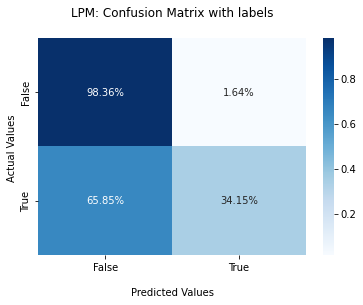

In [12]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred_LPM_50, normalize = 'true'), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('LPM: Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Q3b

In [13]:
y_pred_LPM_80 = np.where(y_pred_LPM > 0.8, 1, 0)
display(y_pred_LPM[:5])
display(y_pred_LPM_80[:5])

array([0.0878514 , 1.17704041, 0.25870375, 0.34661521, 0.46414585])

array([0, 1, 0, 0, 0])

In [14]:
accuracy_score(y_test, y_pred_LPM_80)

0.8165374677002584

In [15]:
cm_LPM_80 = confusion_matrix(y_test, y_pred_LPM_80)
cm_LPM_80

array([[305,   0],
       [ 71,  11]])

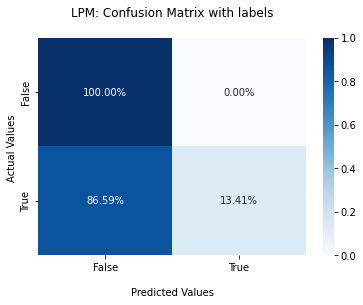

In [16]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred_LPM_80, normalize = 'true'), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('LPM: Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Q5

In [21]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 1))
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [24]:
y_pred_knn1 = pipe.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred_knn1)

0.8837209302325582

In [27]:
confusion_matrix(y_test, y_pred_knn1)

array([[262,  43],
       [  2,  80]])

## Q5a

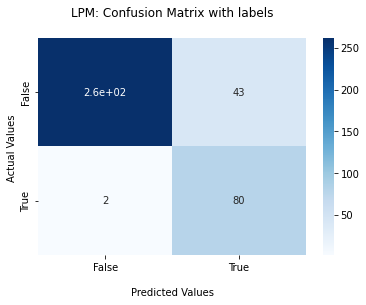

In [30]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred_knn1), annot=True, cmap='Blues')

ax.set_title('LPM: Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Q5b

In [31]:
80/(80+43)

0.6504065040650406

## Q5c

In [33]:
80/82

0.975609756097561

## Q5d

In [34]:
pipe = make_pipeline(KNeighborsClassifier(n_neighbors = 1))
pipe.fit(X_train, y_train)
y_pred_knn1 = pipe.predict(X_test)
accuracy_score(y_test, y_pred_knn1)

0.9664082687338501

# Q6

In [35]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 5))
pipe.fit(X_train, y_train)
y_pred_knn5 = pipe.predict(X_test)
accuracy_score(y_test, y_pred_knn5)

0.8811369509043928

## Q6d

In [36]:
pipe = make_pipeline(KNeighborsClassifier(n_neighbors = 5))
pipe.fit(X_train, y_train)
y_pred_knn5 = pipe.predict(X_test)
accuracy_score(y_test, y_pred_knn5)

0.937984496124031

# Q7

In [44]:
# remove NAs
df = df.dropna()
X = df.drop(["Risk"], axis = 1)
y = df["Risk"]

In [50]:
ks = range(1, int(df.shape[0]*.8))

In [51]:
knni = KNeighborsClassifier()
para = {'n_neighbors':ks}
pipe = make_pipeline(StandardScaler(), \
                     GridSearchCV(knni, para, cv = KFold(5, random_state=13, shuffle=True)))
pipe.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=KFold(n_splits=5, random_state=13, shuffle=True),
                              estimator=KNeighborsClassifier(),
                              param_grid={'n_neighbors': range(1, 620)}))])

In [54]:
X_norm = pd.DataFrame(preprocessing.scale(X))
X_norm.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.669071,0.304129,0.335827,-0.166006,-0.194273,-0.161614,-0.190146,-0.353484,-0.166753,-0.141265
1,-0.669071,-0.432005,-0.393216,-0.119482,-0.178777,-0.198271,-0.202356,-0.819385,-0.276733,-0.172402
2,-0.669071,-0.342190,-0.363566,-0.211331,-0.209370,-0.212393,-0.207059,-0.819385,-0.295112,-0.177606
3,-0.669071,-0.432005,-0.393216,-0.000278,0.004583,-0.035870,-0.030676,1.976022,-0.003134,-0.094940
4,-0.669071,-0.432005,-0.393216,-0.214326,-0.210368,-0.212393,-0.207059,-0.819385,-0.297523,-0.178289


In [55]:
knn_cv = GridSearchCV(knni, para, cv = KFold(5, random_state=13, shuffle=True))
knn_cv.fit(X_norm, y)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 1}
0.967741935483871


# Q9

In [56]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 1))
pipe.fit(X_train, y_train)
y_pred_knn1 = pipe.predict(X_test)
accuracy_score(y_test, y_pred_knn1)

0.8837209302325582

In [61]:
confusion_matrix(y_test, y_pred_knn1)

array([[262,  43],
       [  2,  80]])

In [60]:
num_pred_evasion = confusion_matrix(y_test, y_pred_knn1)[0, 1] + confusion_matrix(y_test, y_pred_knn1)[1, 1]
num_pred_evasion

123

For KNN with k=1 123 firms were predicted to evade taxes and of those 123, 43 (35%) did not commit tax fraud

In [70]:
y_pred_LPM_6 = np.where(y_pred_LPM > 0.06, 1, 0)

In [71]:
confusion_matrix(y_test, y_pred_LPM_6)

array([[243,  62],
       [ 21,  61]])

For the LPM with threshold of 6% so that 123 firms were predicted to have committed tax fraud, 61 (50%) did not actually do it